In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ches_results = pd.read_csv('../data/ches_scores/CHES cal-test-data.csv')

In [3]:
ches_results_test_set = ches_results[ches_results['Cal_Test'] == 'T'].copy()
ches_results_test_set.drop(columns=['Cal_Test'], inplace=True)

In [4]:
ches_results_long = ches_results_test_set.melt(id_vars=['year','country','party','file'], var_name='Dimension', value_name='Expert mean')
ches_results_long

,year,country,party,file,Dimension,Expert mean
0,2006,AUS,Freedom Party of Austria,Austria - AU 2006 - AU 2006 FPO,EU,1.8
1,2010,BEL,ECOLO,Belgium - BEL 2010 - BEL 2010 Green Ecolo,EU,6.0
2,2014,BUL,ATAKA,Bulgaria - BUL 2014 Attack,EU,1.5
3,2010,CZE,KSCM,Czech - CZ 2010 - CZ 2010 Communist KSCM,EU,2.5
4,2019,FIN,KOK,Finland - FIN 2019 - FIN 2019 Nat Coal KOK,EU,6.4
5,2006,NL,Party for Freedom,Netherlands - NL 2006 - NL 2006 VVD,EU,1.6
6,2006,SLOVAK,Direction - Social Democracy,Slovakia - SLO 2006 - SLO 2006 Direction,EU,4.8
7,2019,UK,GREEN,UK - UK 2019 Green,EU,6.7
8,2006,AUS,Freedom Party of Austria,Austria - AU 2006 - AU 2006 FPO,TaxSpend,5.7
9,2010,BEL,ECOLO,Belgium - BEL 2010 - BEL 2010 Green Ecolo,TaxSpend,1.5


In [5]:
# Modify the expert mean to be on a 1-7 scale
ches_results_long['Expert mean'] = ches_results_long.apply(lambda x: pd.to_numeric(x['Expert mean'], errors='coerce')/10*7 if x['Dimension'] != 'EU' else x['Expert mean'], axis=1)

In [6]:
llm_results = pd.read_excel('../data/results/test_set_few_shot_results_fixed_eu.xlsx')

In [7]:
llm_results

,file,issue,model,score,error_message,prompt,created_at
0,../data/plaintext/new_test/UK - UK 2019 Green.txt,european_union,gpt-4o,7.0,NaN,"[SystemMessage(content=""You are an expert soci...",2024-07-25 10:44:44.804
1,../data/plaintext/new_test/UK - UK 2019 Green.txt,european_union,gpt-4o,7.0,NaN,"[SystemMessage(content=""You are an expert soci...",2024-07-25 10:50:30.814
2,../data/plaintext/new_test/UK - UK 2019 Green.txt,european_union,gemini-1.5-pro-001,7.0,NaN,"[SystemMessage(content=""You are an expert soci...",2024-07-25 10:50:37.468
3,../data/plaintext/new_test/UK - UK 2019 Green.txt,european_union,claude-3-5-sonnet-20240620,6.0,NaN,"[SystemMessage(content=""You are an expert soci...",2024-07-25 10:50:39.727
4,../data/plaintext/new_test/UK - UK 2019 Green.txt,taxation,gpt-4o,1.0,NaN,[SystemMessage(content='You are an expert soci...,2024-07-25 10:50:41.258
...,...,...,...,...,...,...,...
140,../data/plaintext/new_test/Austria - AU 2006 -...,environment,gemini-1.5-pro-001,6.0,NaN,[SystemMessage(content='You are an expert soci...,2024-07-25 11:04:25.494
141,../data/plaintext/new_test/Austria - AU 2006 -...,environment,claude-3-5-sonnet-20240620,6.0,NaN,[SystemMessage(content='You are an expert soci...,2024-07-25 11:04:28.096
142,../data/plaintext/new_test/Austria - AU 2006 -...,decentralization,gpt-4o,6.0,NaN,[SystemMessage(content='You are an expert soci...,2024-07-25 11:04:29.570
143,../data/plaintext/new_test/Austria - AU 2006 -...,decentralization,gemini-1.5-pro-001,6.0,NaN,[SystemMessage(content='You are an expert soci...,2024-07-25 11:04:31.817


In [8]:
issue_map = {'european_union': 'EU',
             'taxation': 'TaxSpend',
             'lifestyle': 'Social_lifestyle',
             'immigration': 'Immigration',
             'environment': 'Environment',
             'decentralization': 'Decentralization'}

In [9]:
llm_results['ches_issue'] = llm_results['issue'].map(issue_map)

In [10]:
llm_results

,file,issue,model,score,error_message,prompt,created_at,ches_issue
0,../data/plaintext/new_test/UK - UK 2019 Green.txt,european_union,gpt-4o,7.0,NaN,"[SystemMessage(content=""You are an expert soci...",2024-07-25 10:44:44.804,EU
1,../data/plaintext/new_test/UK - UK 2019 Green.txt,european_union,gpt-4o,7.0,NaN,"[SystemMessage(content=""You are an expert soci...",2024-07-25 10:50:30.814,EU
2,../data/plaintext/new_test/UK - UK 2019 Green.txt,european_union,gemini-1.5-pro-001,7.0,NaN,"[SystemMessage(content=""You are an expert soci...",2024-07-25 10:50:37.468,EU
3,../data/plaintext/new_test/UK - UK 2019 Green.txt,european_union,claude-3-5-sonnet-20240620,6.0,NaN,"[SystemMessage(content=""You are an expert soci...",2024-07-25 10:50:39.727,EU
4,../data/plaintext/new_test/UK - UK 2019 Green.txt,taxation,gpt-4o,1.0,NaN,[SystemMessage(content='You are an expert soci...,2024-07-25 10:50:41.258,TaxSpend
...,...,...,...,...,...,...,...,...
140,../data/plaintext/new_test/Austria - AU 2006 -...,environment,gemini-1.5-pro-001,6.0,NaN,[SystemMessage(content='You are an expert soci...,2024-07-25 11:04:25.494,Environment
141,../data/plaintext/new_test/Austria - AU 2006 -...,environment,claude-3-5-sonnet-20240620,6.0,NaN,[SystemMessage(content='You are an expert soci...,2024-07-25 11:04:28.096,Environment
142,../data/plaintext/new_test/Austria - AU 2006 -...,decentralization,gpt-4o,6.0,NaN,[SystemMessage(content='You are an expert soci...,2024-07-25 11:04:29.570,Decentralization
143,../data/plaintext/new_test/Austria - AU 2006 -...,decentralization,gemini-1.5-pro-001,6.0,NaN,[SystemMessage(content='You are an expert soci...,2024-07-25 11:04:31.817,Decentralization


In [11]:
llm_results['ches_file'] = llm_results.file.apply(lambda x: x.split('/')[-1].split('.')[0].strip())

In [12]:
llm_results['ches_file']

0                   UK - UK 2019 Green
1                   UK - UK 2019 Green
2                   UK - UK 2019 Green
3                   UK - UK 2019 Green
4                   UK - UK 2019 Green
                    ...               
140    Austria - AU 2006 - AU 2006 FPO
141    Austria - AU 2006 - AU 2006 FPO
142    Austria - AU 2006 - AU 2006 FPO
143    Austria - AU 2006 - AU 2006 FPO
144    Austria - AU 2006 - AU 2006 FPO
Name: ches_file, Length: 145, dtype: object

In [13]:
ches_results_long.file.value_counts()

file
Austria - AU 2006 - AU 2006 FPO               6
Belgium - BEL 2010 - BEL 2010 Green Ecolo     6
Bulgaria - BUL 2014 Attack                    6
Czech - CZ 2010 - CZ 2010 Communist KSCM      6
Finland - FIN 2019 - FIN 2019 Nat Coal KOK    6
Netherlands - NL 2006 - NL 2006 VVD           6
Slovakia - SLO 2006 - SLO 2006 Direction      6
UK - UK 2019 Green                            6
Name: count, dtype: int64

In [14]:
llm_results.ches_file.value_counts()

ches_file
UK - UK 2019 Green                            19
Netherlands - NL 2006 - NL 2006 VVD           18
Finland - FIN 2019 - FIN 2019 Nat Coal KOK    18
Slovakia - SLO 2006 - SLO 2006 Direction      18
Belgium - BEL 2010 - BEL 2010 Green Ecolo     18
Czech - CZ 2010 - CZ 2010 Communist KSCM      18
Bulgaria - BUL 2014 Attack                    18
Austria - AU 2006 - AU 2006 FPO               18
Name: count, dtype: int64

In [15]:
merged_results = llm_results.merge(ches_results_long[['file', 'Dimension', 'Expert mean']], left_on=['ches_file','ches_issue'], right_on=['file', 'Dimension'], how='left', copy=False)

In [16]:
merged_results

,file_x,issue,model,score,error_message,prompt,created_at,ches_issue,ches_file,file_y,Dimension,Expert mean
0,../data/plaintext/new_test/UK - UK 2019 Green.txt,european_union,gpt-4o,7.0,NaN,"[SystemMessage(content=""You are an expert soci...",2024-07-25 10:44:44.804,EU,UK - UK 2019 Green,UK - UK 2019 Green,EU,6.70
1,../data/plaintext/new_test/UK - UK 2019 Green.txt,european_union,gpt-4o,7.0,NaN,"[SystemMessage(content=""You are an expert soci...",2024-07-25 10:50:30.814,EU,UK - UK 2019 Green,UK - UK 2019 Green,EU,6.70
2,../data/plaintext/new_test/UK - UK 2019 Green.txt,european_union,gemini-1.5-pro-001,7.0,NaN,"[SystemMessage(content=""You are an expert soci...",2024-07-25 10:50:37.468,EU,UK - UK 2019 Green,UK - UK 2019 Green,EU,6.70
3,../data/plaintext/new_test/UK - UK 2019 Green.txt,european_union,claude-3-5-sonnet-20240620,6.0,NaN,"[SystemMessage(content=""You are an expert soci...",2024-07-25 10:50:39.727,EU,UK - UK 2019 Green,UK - UK 2019 Green,EU,6.70
4,../data/plaintext/new_test/UK - UK 2019 Green.txt,taxation,gpt-4o,1.0,NaN,[SystemMessage(content='You are an expert soci...,2024-07-25 10:50:41.258,TaxSpend,UK - UK 2019 Green,UK - UK 2019 Green,TaxSpend,1.40
...,...,...,...,...,...,...,...,...,...,...,...,...
140,../data/plaintext/new_test/Austria - AU 2006 -...,environment,gemini-1.5-pro-001,6.0,NaN,[SystemMessage(content='You are an expert soci...,2024-07-25 11:04:25.494,Environment,Austria - AU 2006 - AU 2006 FPO,Austria - AU 2006 - AU 2006 FPO,Environment,NaN
141,../data/plaintext/new_test/Austria - AU 2006 -...,environment,claude-3-5-sonnet-20240620,6.0,NaN,[SystemMessage(content='You are an expert soci...,2024-07-25 11:04:28.096,Environment,Austria - AU 2006 - AU 2006 FPO,Austria - AU 2006 - AU 2006 FPO,Environment,NaN
142,../data/plaintext/new_test/Austria - AU 2006 -...,decentralization,gpt-4o,6.0,NaN,[SystemMessage(content='You are an expert soci...,2024-07-25 11:04:29.570,Decentralization,Austria - AU 2006 - AU 2006 FPO,Austria - AU 2006 - AU 2006 FPO,Decentralization,4.34
143,../data/plaintext/new_test/Austria - AU 2006 -...,decentralization,gemini-1.5-pro-001,6.0,NaN,[SystemMessage(content='You are an expert soci...,2024-07-25 11:04:31.817,Decentralization,Austria - AU 2006 - AU 2006 FPO,Austria - AU 2006 - AU 2006 FPO,Decentralization,4.34


In [17]:
merged_results[merged_results['Expert mean'].isna()].ches_file.value_counts()

ches_file
Netherlands - NL 2006 - NL 2006 VVD         3
Slovakia - SLO 2006 - SLO 2006 Direction    3
Austria - AU 2006 - AU 2006 FPO             3
Name: count, dtype: int64

In [18]:
cleaned_results = merged_results[~merged_results['Expert mean'].isna()]

In [19]:
cleaned_results = cleaned_results.drop(columns=['Dimension', 'file_x','file_y','issue','error_message','created_at'])

In [20]:
cleaned_results

,model,score,prompt,ches_issue,ches_file,Expert mean
0,gpt-4o,7.0,"[SystemMessage(content=""You are an expert soci...",EU,UK - UK 2019 Green,6.70
1,gpt-4o,7.0,"[SystemMessage(content=""You are an expert soci...",EU,UK - UK 2019 Green,6.70
2,gemini-1.5-pro-001,7.0,"[SystemMessage(content=""You are an expert soci...",EU,UK - UK 2019 Green,6.70
3,claude-3-5-sonnet-20240620,6.0,"[SystemMessage(content=""You are an expert soci...",EU,UK - UK 2019 Green,6.70
4,gpt-4o,1.0,[SystemMessage(content='You are an expert soci...,TaxSpend,UK - UK 2019 Green,1.40
...,...,...,...,...,...,...
137,gemini-1.5-pro-001,7.0,[SystemMessage(content='You are an expert soci...,Immigration,Austria - AU 2006 - AU 2006 FPO,6.86
138,claude-3-5-sonnet-20240620,7.0,[SystemMessage(content='You are an expert soci...,Immigration,Austria - AU 2006 - AU 2006 FPO,6.86
142,gpt-4o,6.0,[SystemMessage(content='You are an expert soci...,Decentralization,Austria - AU 2006 - AU 2006 FPO,4.34
143,gemini-1.5-pro-001,6.0,[SystemMessage(content='You are an expert soci...,Decentralization,Austria - AU 2006 - AU 2006 FPO,4.34


In [21]:
cleaned_results['difference'] = pd.to_numeric(cleaned_results['score'], errors='coerce') - pd.to_numeric(cleaned_results['Expert mean'], errors='coerce')

### Trimming out the ones claude couldn't finish

<Axes: >

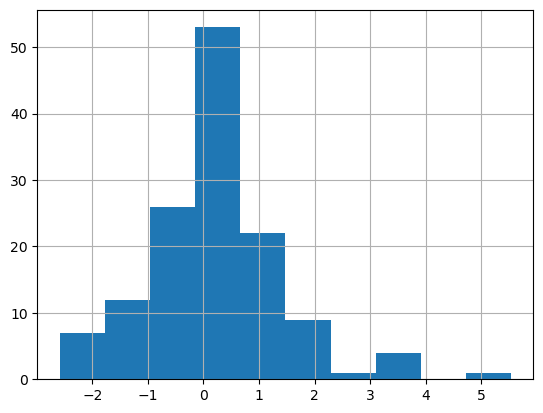

In [23]:
cleaned_results['difference'].hist()

In [24]:
sns.set_theme(style="whitegrid")

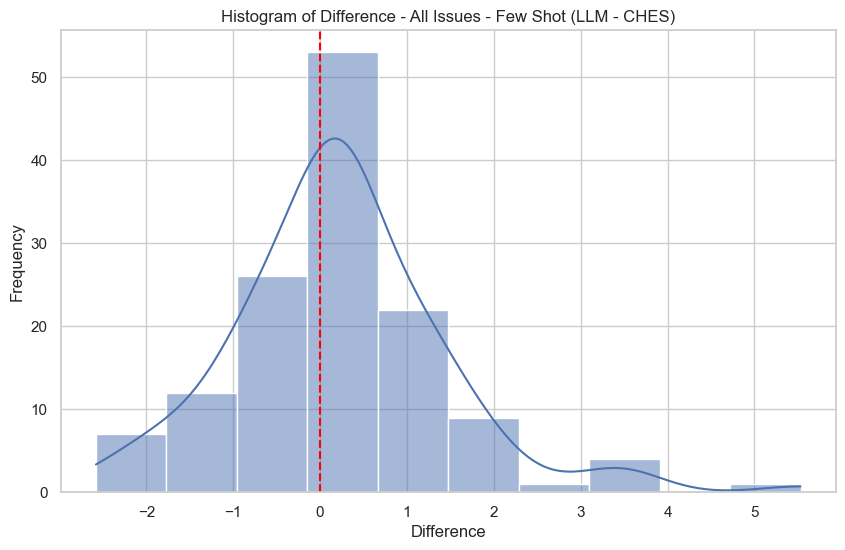

In [25]:

# 1. Histogram of 'difference'
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_results['difference'], bins=10, kde=True)
plt.title('Histogram of Difference - All Issues - Few Shot (LLM - CHES)')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.axvline(x=0, linestyle='--', color='red')
plt.show()

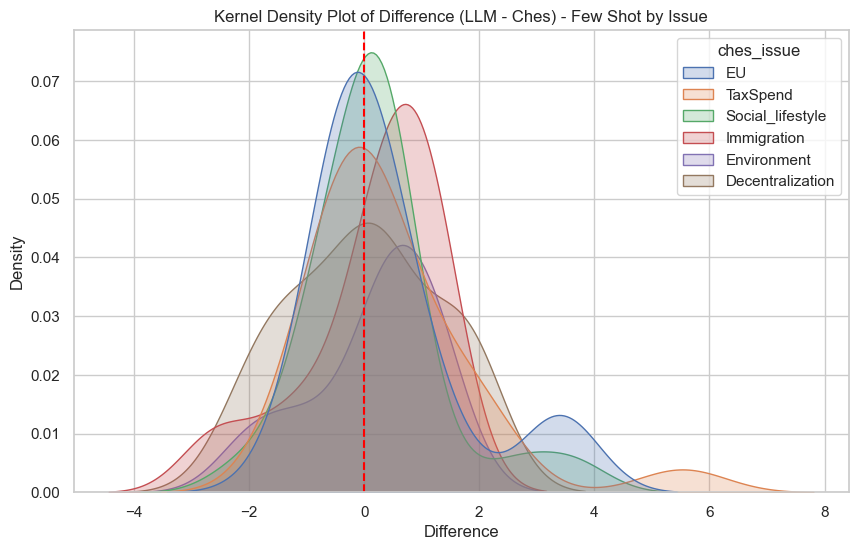

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=cleaned_results, x='difference', hue='ches_issue', fill=True)
plt.title('Kernel Density Plot of Difference (LLM - Ches) - Few Shot by Issue')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.axvline(x=0, linestyle='--', color='red')
plt.show()

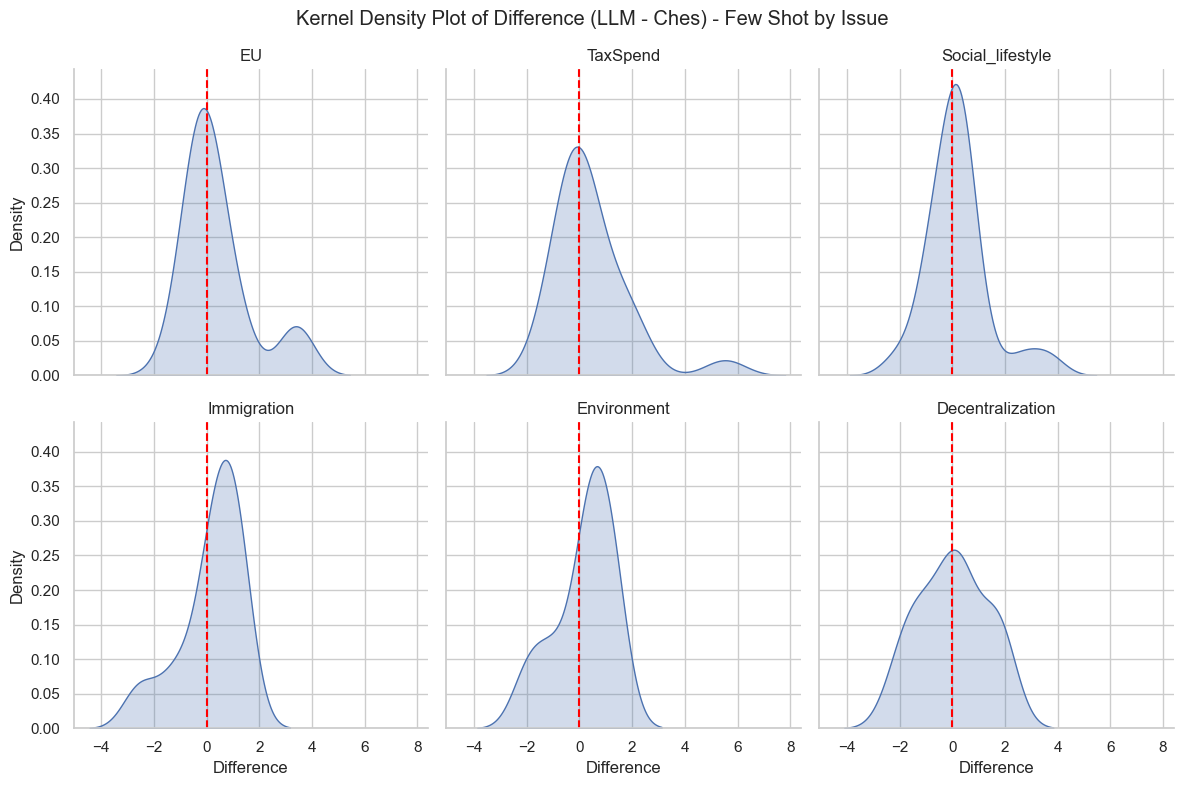

In [27]:
# Create the FacetGrid
g = sns.FacetGrid(cleaned_results, col="ches_issue", col_wrap=3, height=4, sharex=True, sharey=True)

# Map the kdeplot to each facet
g.map(sns.kdeplot, "difference", fill=True)

# Add titles and adjust the layout
g.set_titles("{col_name}")
g.set_axis_labels("Difference", "Density")
plt.subplots_adjust(top=0.9)
g.figure.suptitle('Kernel Density Plot of Difference (LLM - Ches) - Few Shot by Issue')
g.map(plt.axvline, x=0, linestyle='--', color='red')

# Show the plot
plt.show()

In [28]:
cleaned_results.model

0                          gpt-4o
1                          gpt-4o
2              gemini-1.5-pro-001
3      claude-3-5-sonnet-20240620
4                          gpt-4o
                  ...            
137            gemini-1.5-pro-001
138    claude-3-5-sonnet-20240620
142                        gpt-4o
143            gemini-1.5-pro-001
144    claude-3-5-sonnet-20240620
Name: model, Length: 136, dtype: object

In [29]:
cleaned_results.model = cleaned_results.model.map({'gemini-1.5-pro-001': 'Gemini 1.5 Pro',
                           'claude-3-5-sonnet-20240620': 'Claude 3.5 Sonnet',
                           'gpt-4o': 'GPT-4o',})

In [30]:
cleaned_results.model.value_counts()

model
GPT-4o               46
Gemini 1.5 Pro       45
Claude 3.5 Sonnet    45
Name: count, dtype: int64

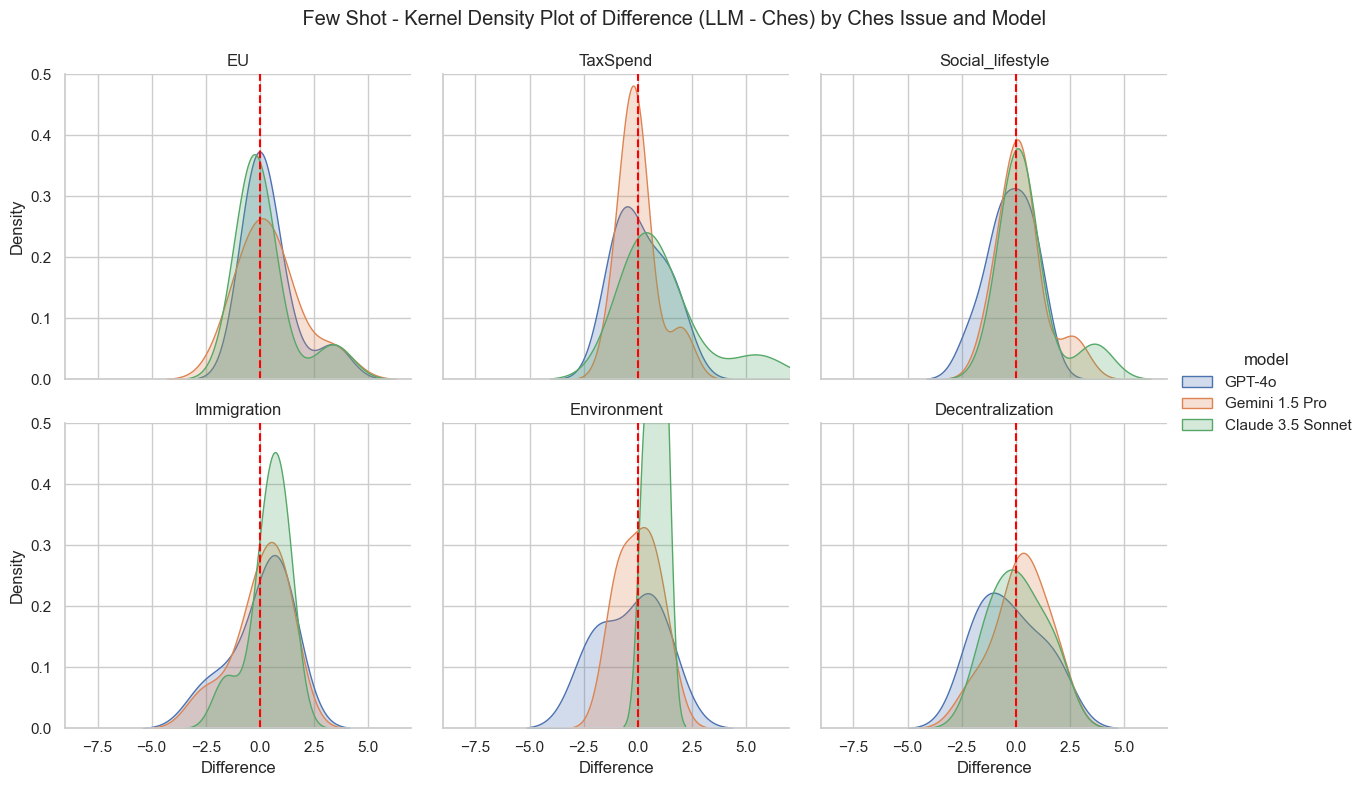

In [31]:
g = sns.FacetGrid(cleaned_results, col="ches_issue", hue="model", col_wrap=3, height=4, sharex=True, sharey=True)

# Map the kdeplot to each facet
g.map(sns.kdeplot, "difference", fill=True)

# Add a vertical line at 0 to each facet
for ax in g.axes.flat:
    ax.axvline(x=0, linestyle='--', color='red')

# Add titles and adjust the layout
g.set_titles("{col_name}")
g.set_axis_labels("Difference", "Density")
plt.subplots_adjust(top=0.9)
g.figure.suptitle(' Few Shot - Kernel Density Plot of Difference (LLM - Ches) by Ches Issue and Model')

# Add legend
g.add_legend()

g.set(xlim=(-9, 7))
g.set(ylim=(0, 0.5))

# Show the plot
plt.show()

In [33]:
cleaned_results.to_excel('../data/results/ches_comparison_results_fixed_eu.xlsx', index=False)